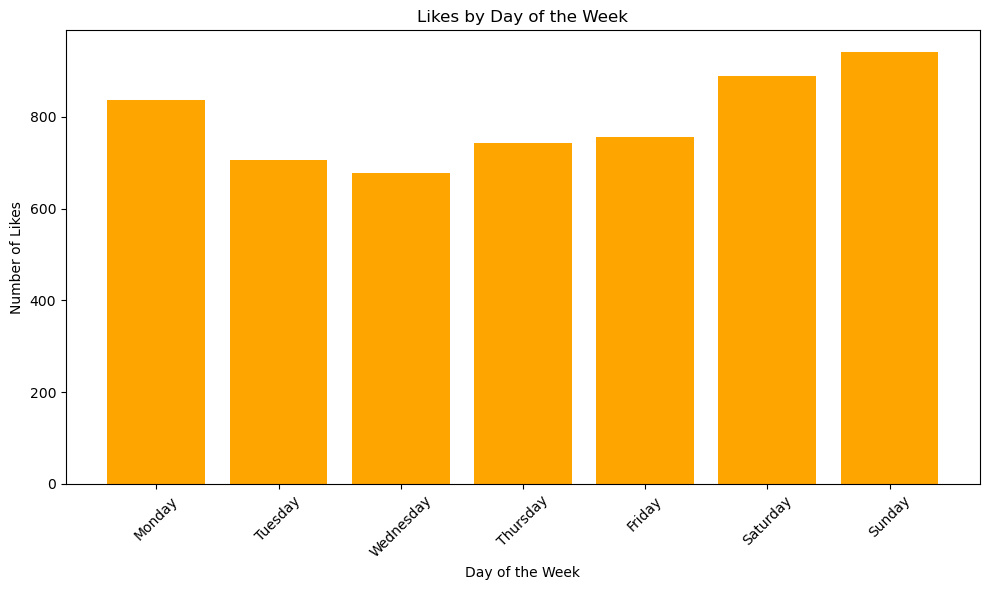

In [5]:
import json
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt

def convert_timestamp(timestamp):
    return datetime.fromtimestamp(timestamp).strftime('%A')

def categorize_likes_by_day(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    likes_per_day = Counter()

    for post in data['likes_media_likes']:
        for item in post['string_list_data']:
            timestamp = item['timestamp']
            day_of_week = convert_timestamp(timestamp)
            likes_per_day[day_of_week] += 1

    return likes_per_day

def plot_likes_by_day(likes_per_day):
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    likes = [likes_per_day.get(day, 0) for day in days_of_week]

    plt.figure(figsize=(10, 6))  # Adjusting the figure size
    plt.bar(days_of_week, likes, color='orange')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Likes')
    plt.title('Likes by Day of the Week')
    plt.xticks(rotation=45)  # Rotating the labels on x-axis
    plt.tight_layout()  # Adjust layout to fit everything nicely
    plt.show()

file_path = 'liked_posts.json'
likes_by_day = categorize_likes_by_day(file_path)
plot_likes_by_day(likes_by_day)

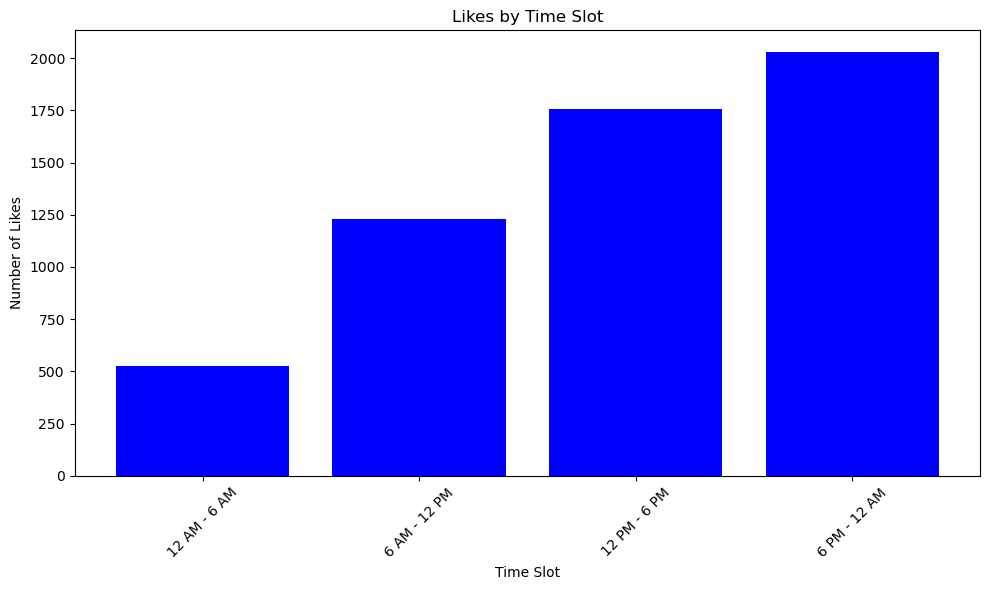

In [6]:

def get_time_slot(hour):
    if 0 <= hour < 6:
        return '12 AM - 6 AM'
    elif 6 <= hour < 12:
        return '6 AM - 12 PM'
    elif 12 <= hour < 18:
        return '12 PM - 6 PM'
    else:
        return '6 PM - 12 AM'

def categorize_likes_by_time_slot(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    likes_per_time_slot = Counter()

    for post in data['likes_media_likes']:
        for item in post['string_list_data']:
            timestamp = item['timestamp']
            hour = datetime.fromtimestamp(timestamp).hour
            time_slot = get_time_slot(hour)
            likes_per_time_slot[time_slot] += 1

    return likes_per_time_slot

def plot_likes_by_time_slot(likes_per_time_slot):
    time_slots = ['12 AM - 6 AM', '6 AM - 12 PM', '12 PM - 6 PM', '6 PM - 12 AM']
    likes = [likes_per_time_slot.get(slot, 0) for slot in time_slots]

    plt.figure(figsize=(10, 6))
    plt.bar(time_slots, likes, color='blue')
    plt.xlabel('Time Slot')
    plt.ylabel('Number of Likes')
    plt.title('Likes by Time Slot')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


file_path = 'liked_posts.json'
likes_by_time_slot = categorize_likes_by_time_slot(file_path)
plot_likes_by_time_slot(likes_by_time_slot)


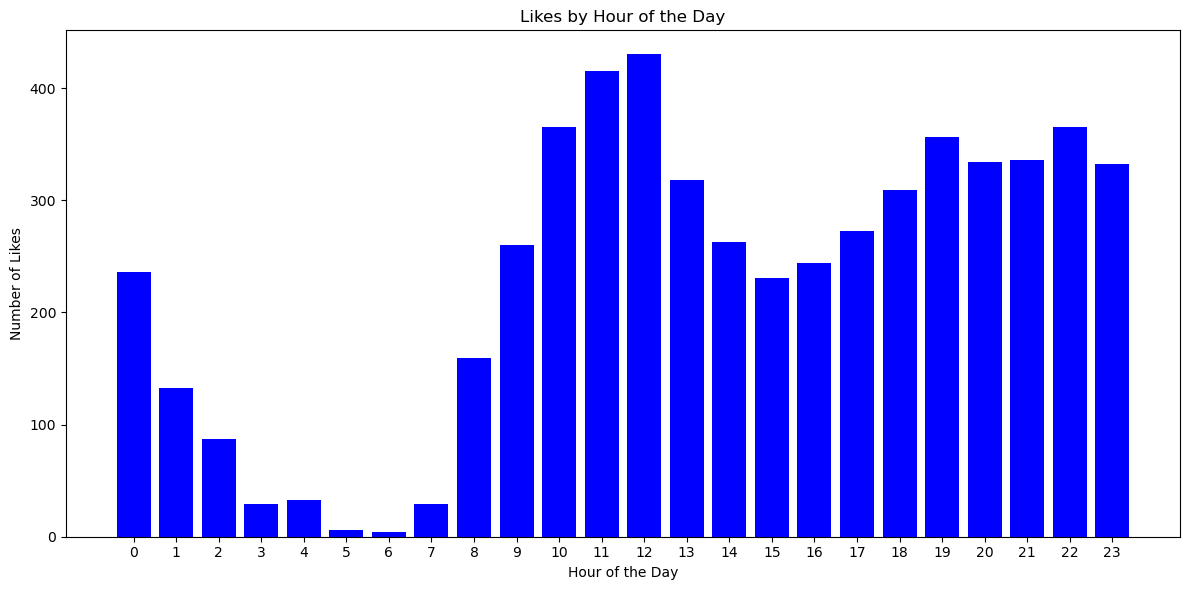

In [7]:
def categorize_likes_by_hour(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    likes_per_hour = Counter()

    for post in data['likes_media_likes']:
        for item in post['string_list_data']:
            timestamp = item['timestamp']
            hour = datetime.fromtimestamp(timestamp).hour
            likes_per_hour[hour] += 1

    return likes_per_hour

def plot_likes_by_hour(likes_per_hour):
    hours = range(24)  # 0 to 23 hours
    likes = [likes_per_hour.get(hour, 0) for hour in hours]

    plt.figure(figsize=(12, 6))
    plt.bar(hours, likes, color='blue')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Likes')
    plt.title('Likes by Hour of the Day')
    plt.xticks(hours)
    plt.tight_layout()
    plt.show()

file_path = 'liked_posts.json'
likes_by_hour = categorize_likes_by_hour(file_path)
plot_likes_by_hour(likes_by_hour)


[nltk_data] Downloading package punkt to /Users/crunky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/crunky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


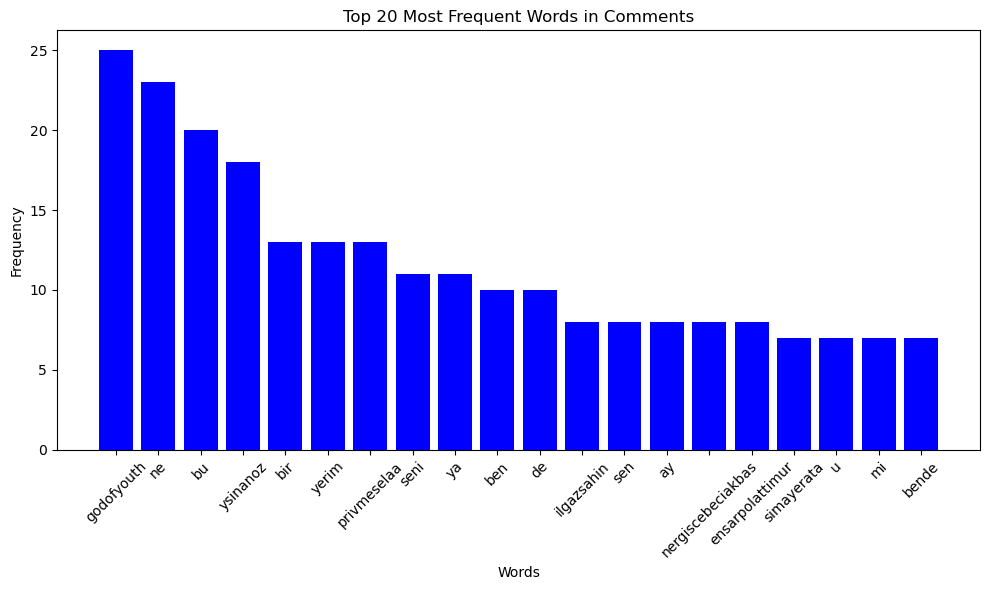

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure you have the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def analyze_comments(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    words = []
    for entry in data:
        comment = entry['string_map_data']['Comment']['value']
        words.extend(word_tokenize(comment.lower()))

    # Remove stopwords and non-alphabetic words
    filtered_words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    word_freq = Counter(filtered_words)

    most_common_words = word_freq.most_common(20)
    return most_common_words

def analyze_media_owners(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    owners = []
    for entry in data:
        if 'Media Owner' in entry['string_map_data']:
            owners.append(entry['string_map_data']['Media Owner']['value'])

    owner_freq = Counter(owners)
    most_common_owners = owner_freq.most_common(15)
    return most_common_owners


def analyze_hourly_comments(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    hourly_comments = Counter()
    for entry in data:
        timestamp = entry['string_map_data']['Time']['timestamp']
        hour = datetime.fromtimestamp(timestamp).hour
        hourly_comments[hour] += 1

    return hourly_comments

def plot_data(data, title, xlabel, ylabel):
    items, counts = zip(*data)
    plt.figure(figsize=(10, 6))
    plt.bar(items, counts, color='blue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Use the functions like this:
file_path = 'post_comments_1.json'

# Comment Analysis
comment_data = analyze_comments(file_path)
plot_data(comment_data, 'Top 20 Most Frequent Words in Comments', 'Words', 'Frequency')



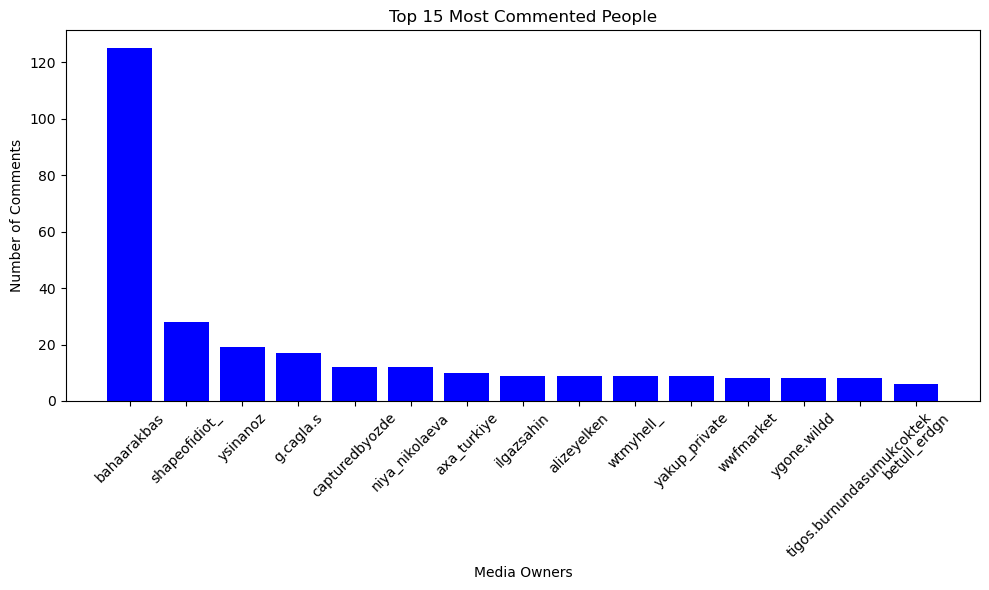

In [15]:
# Media Owner Analysis
owner_data = analyze_media_owners(file_path)
plot_data(owner_data, 'Top 15 Most Commented People', 'Media Owners', 'Number of Comments')


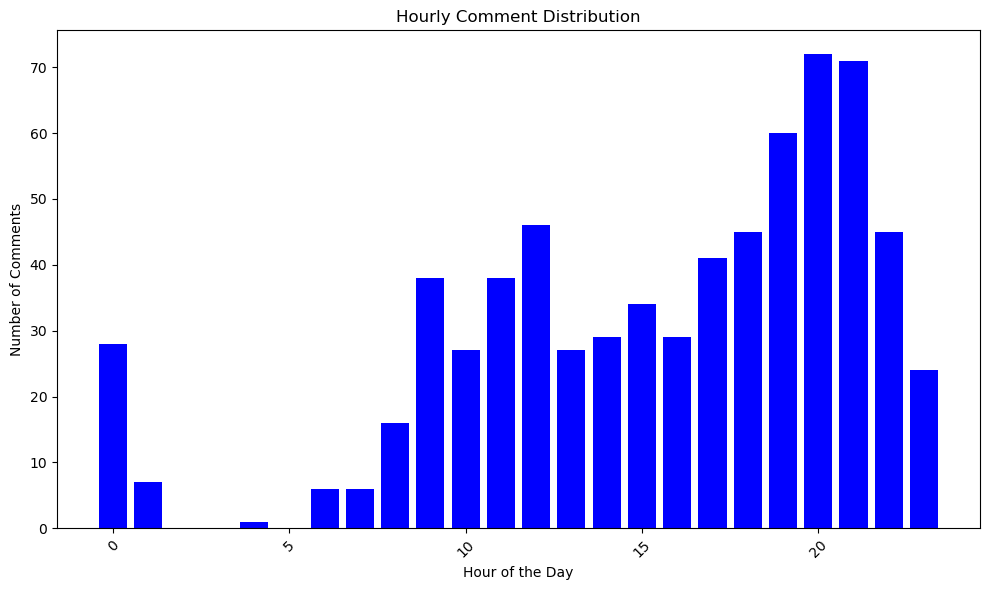

In [12]:
# Hourly Analysis
hourly_data = analyze_hourly_comments(file_path).items()
plot_data(sorted(hourly_data), 'Hourly Comment Distribution', 'Hour of the Day', 'Number of Comments')

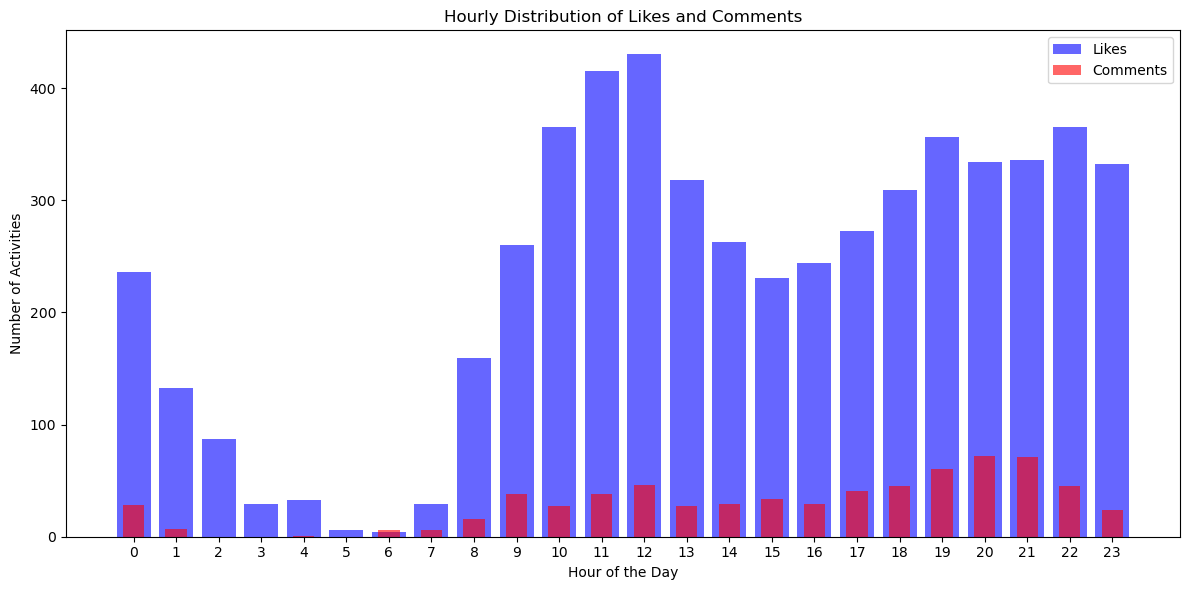

In [14]:
def extract_hourly_likes(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    hourly_likes = Counter()
    for post in data['likes_media_likes']:
        for item in post['string_list_data']:
            timestamp = item['timestamp']
            hour = datetime.fromtimestamp(timestamp).hour
            hourly_likes[hour] += 1

    return hourly_likes

def extract_hourly_comments(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    hourly_comments = Counter()
    for comment in data:
        timestamp = comment['string_map_data']['Time']['timestamp']
        hour = datetime.fromtimestamp(timestamp).hour
        hourly_comments[hour] += 1

    return hourly_comments

def plot_combined_hourly_data(likes_data, comments_data):
    hours = range(24)
    likes = [likes_data.get(hour, 0) for hour in hours]
    comments = [comments_data.get(hour, 0) for hour in hours]

    plt.figure(figsize=(12, 6))
    plt.bar(hours, likes, color='blue', alpha=0.6, label='Likes')
    plt.bar(hours, comments, color='red', alpha=0.6, label='Comments', width=0.5)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Activities')
    plt.title('Hourly Distribution of Likes and Comments')
    plt.xticks(hours)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Paths to your files
likes_file_path = 'liked_posts.json'
comments_file_path = 'post_comments_1.json'

# Extract hourly data
hourly_likes = extract_hourly_likes(likes_file_path)
hourly_comments = extract_hourly_comments(comments_file_path)

# Plot combined data
plot_combined_hourly_data(hourly_likes, hourly_comments)
